In [1]:
#!pip install dask[complete]

In [2]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import os
from commun import fonctions as fct
from commun import fonction_plot as fp 
from commun import Opset as Op
from IPython.display import display
from ipywidgets import interact, IntSlider,Dropdown, fixed
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import*
from sklearn.cluster import KMeans
import seaborn as sns




import matplotlib.pyplot as plt

# Ce bout de code est pratique car il permet de recharger automatiquement un package quand on le developpe.
%reload_ext autoreload
%autoreload 2

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Ignorer les avertissements de type UserWarning
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
def extract_h5(repertoire_source):
    extract={}
    
    for nom_fichier in os.listdir(repertoire_source):
        if nom_fichier[-3:]=='.h5':
            ddf=fct.lire_hdf_dask(nom_fichier, repertoire_source)
            extract[nom_fichier]=ddf
            print(f"DataFrame Dask du fichier {nom_fichier} a été chargé")
    return extract

chemin_repertoire="/Users/renaud/Desktop/Laptop_Ubuntu/MACS3/Statistiques/Projet/data"

# La variable extract est un dictionnaire dans lequel chaque paire clé-valeur correspond à un Dask DataFrame associé à un avion

extract=extract_h5(chemin_repertoire)
            


DataFrame Dask du fichier Aircraft_01.h5 a été chargé
DataFrame Dask du fichier Aircraft_02.h5 a été chargé
DataFrame Dask du fichier Aircraft_03.h5 a été chargé


# Affichage interactif des caractéristiques de chaque vol pour les 3 avions

In [4]:
# Récupération des clés du dictionnaire 
keys=list(extract.keys())

List_chemins=[]
for key in keys:
    #Affichage du nombre de partitions de chaque avion
    print(f"L'avion {key} contient {extract[key].npartitions} partitions.")
 

    #Affichage interactif
for key in keys:
    ds=fct.Affichage_Interactif(chemin_repertoire + "/" + key, Nomfichier=key[:-3], ddf=extract[key]).plotc()
    display(ds)


L'avion Aircraft_01.h5 contient 999 partitions.
L'avion Aircraft_02.h5 contient 1002 partitions.
L'avion Aircraft_03.h5 contient 1002 partitions.


##  Quelques affichages intéressant pouvant mener à des études statistiques



    

### Affichons la différance entre Q1 et Q2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


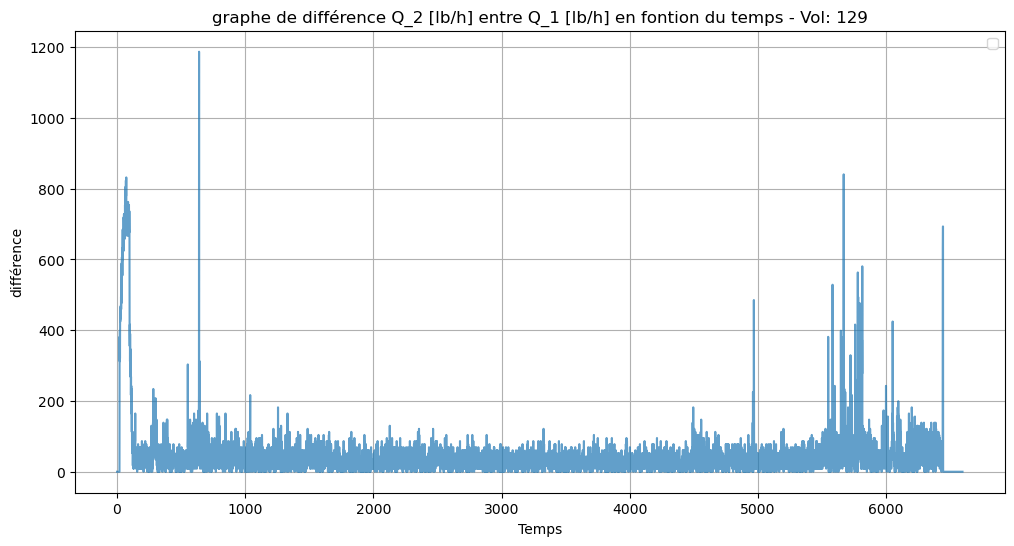

In [5]:
fct.graphe_comparaison_différence(extract[keys[0]], 129, 'Q_2 [lb/h]', 'Q_1 [lb/h]') #Vol 10


### Q1 et Q2 sont ils corrrélés?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:               ALT [ft]   R-squared (uncentered):                   0.586
Model:                            OLS   Adj. R-squared (uncentered):              0.585
Method:                 Least Squares   F-statistic:                              9948.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:41:12   Log-Likelihood:                         -79533.
No. Observations:                7042   AIC:                                  1.591e+05
Df Residuals:                    7041   BIC:                                  1.591e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

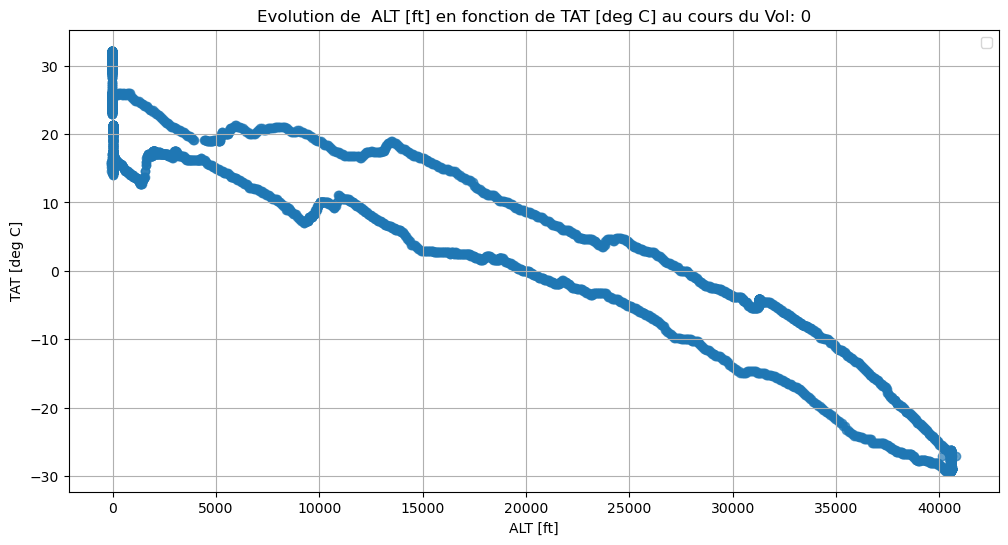

In [6]:
fct.Regression_lineaire(extract[keys[0]], 0, 'ALT [ft]', 'TAT [deg C]')

### Affichons la différance entre T1_1 et T1_2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


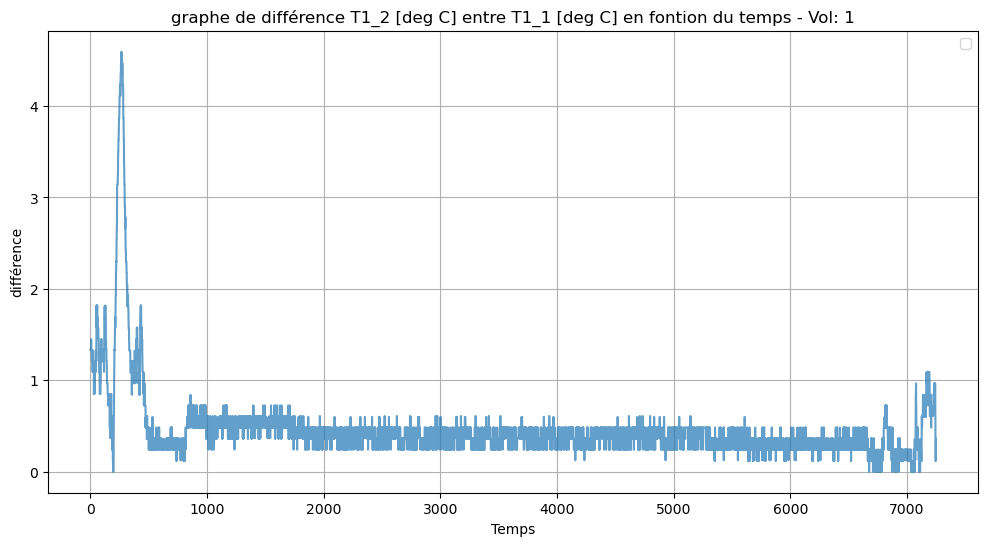

In [7]:
fct.graphe_comparaison_différence(extract[keys[0]], 1, 'T1_2 [deg C]', 'T1_1 [deg C]')

### T1_1 et T1_2 sont ils corrrélés?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:            TAT [deg C]   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          4.579e+05
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:41:12   Log-Likelihood:                         -17294.
No. Observations:                7042   AIC:                                  3.459e+04
Df Residuals:                    7041   BIC:                                  3.460e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

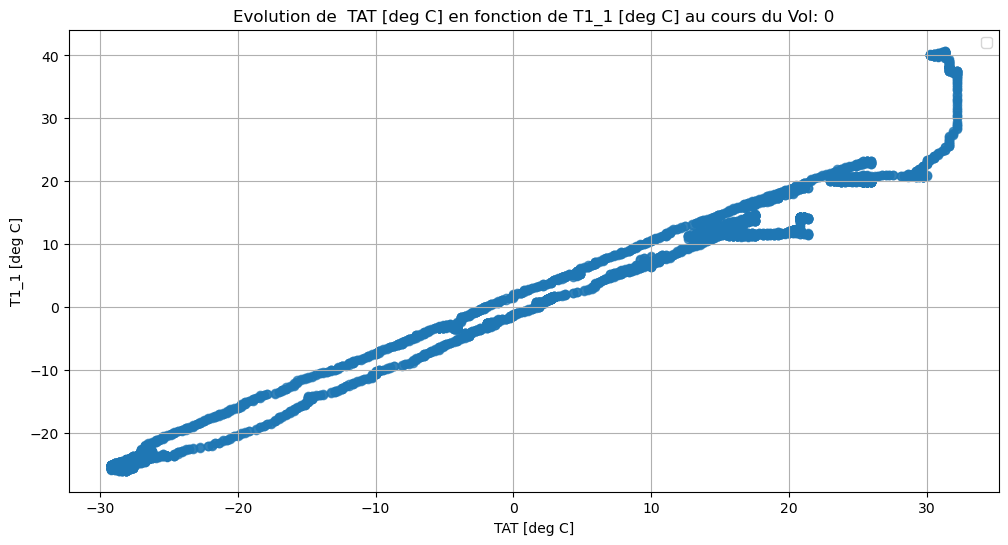

In [8]:
fct.Regression_lineaire(extract[keys[0]], 0, 'TAT [deg C]', 'T1_1 [deg C]')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


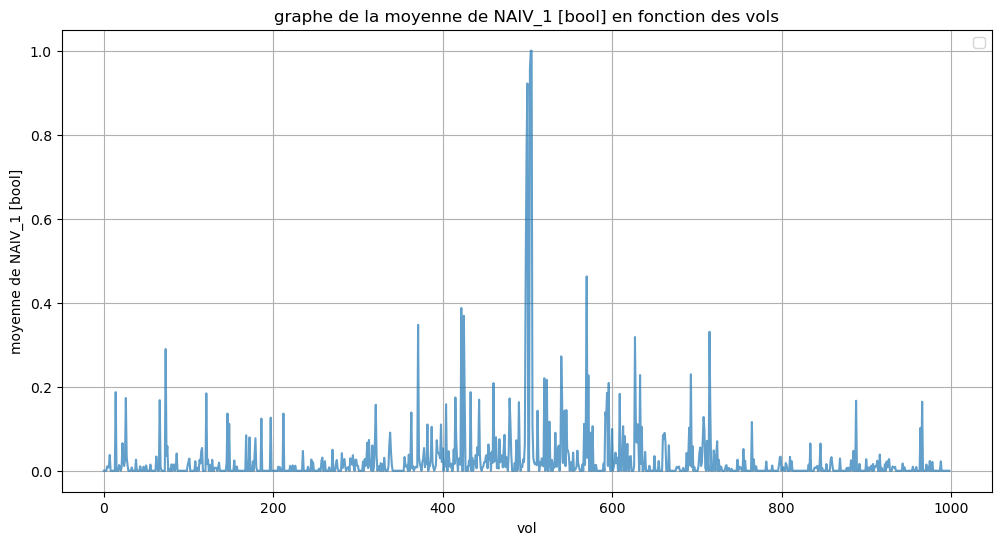

In [9]:
#moyenne_sur_colonne(extract[keys[0]], 'Q_1 [lb/h]')
moy_col=fct.moyenne_sur_colonne(extract[keys[0]], 'NAIV_1 [bool]')

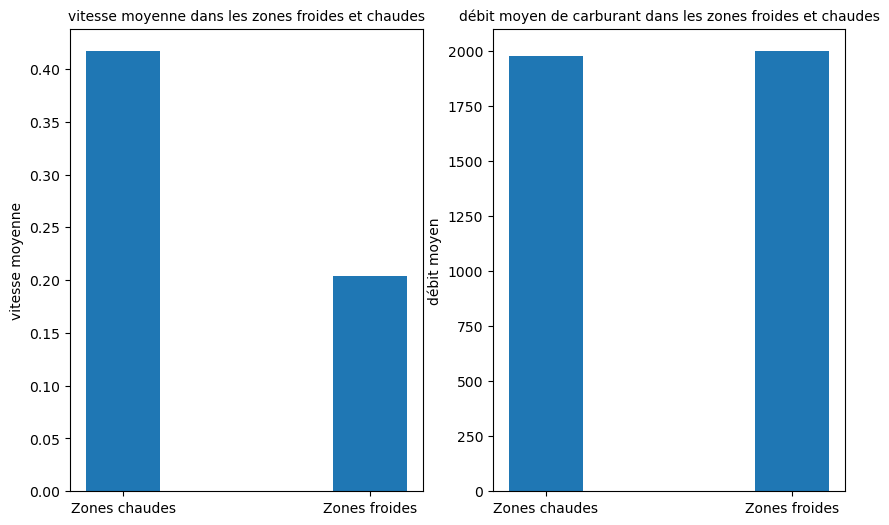

In [10]:
vitesse_zones = extract[keys[0]].groupby('NAIV_1 [bool]').agg({'M [Mach]': 'mean'}).compute()


plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.bar(np.arange(vitesse_zones.size), vitesse_zones['M [Mach]'], tick_label=['Zones chaudes', 'Zones froides'], width=0.3)
plt.title(f'vitesse moyenne dans les zones froides et chaudes', fontsize=10)
plt.ylabel('vitesse moyenne')

debit_zones = extract[keys[0]].groupby('NAIV_1 [bool]').agg({'Q_1 [lb/h]': 'mean'}).compute()

plt.subplot(1,2,2)
plt.bar(np.arange(debit_zones.size), debit_zones['Q_1 [lb/h]'], tick_label=['Zones chaudes', 'Zones froides'], width=0.3)
plt.title(f'débit moyen de carburant dans les zones froides et chaudes' , fontsize=10)
plt.ylabel('débit moyen')
plt.show()

### Classification des étapes de vol

<BarContainer object of 4 artists>

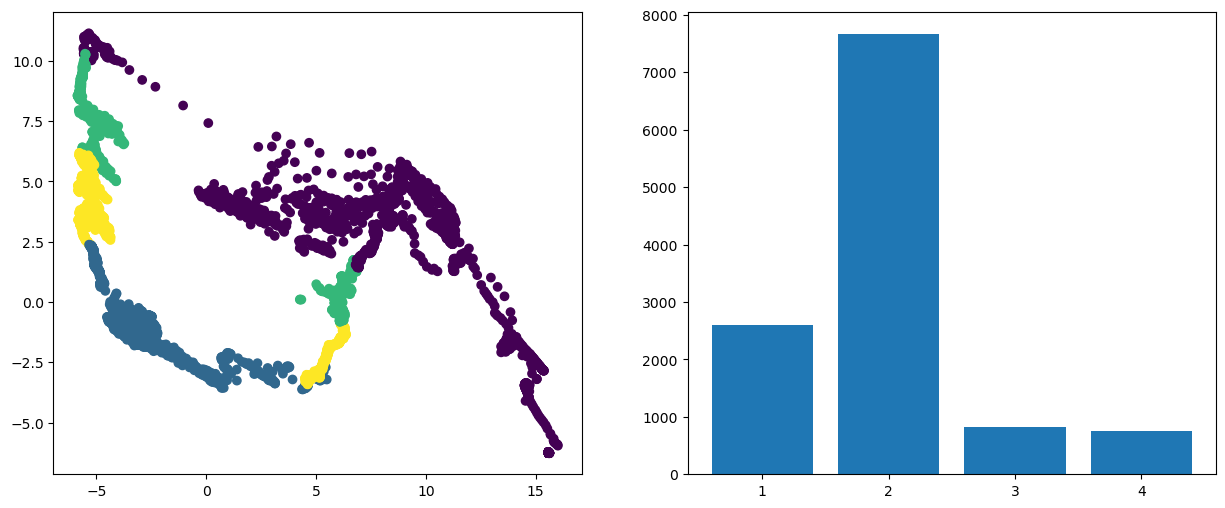

In [11]:
df_test=extract[key].partitions[1].compute()
df_test.head()
k=4
kmeans = KMeans(n_clusters=k)

kmeans.fit(df_test)

# Obtenir les étiquettes de cluster pour chaque point de données
labels_kmeans = kmeans.labels_

# Obtenir les centres de cluster
centers = kmeans.cluster_centers_





# Effectuons une Réduction de dim dans le plan
df_test_Norm=StandardScaler().fit_transform(df_test)
pca = PCA(n_components=2)

# Ajuster l'ACP aux données et obtenir les composantes principales
principal_components = pca.fit_transform(df_test_Norm)
pca.explained_variance_ratio_*100

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

plt.scatter(principal_components[:,0], principal_components[:,1], cmap="viridis", c=labels_kmeans)

plt.subplot(1,2,2)

count=np.bincount(labels_kmeans)

plt.bar(np.arange(count.size), count, tick_label=range(1,len(count)+1))







No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 OLS Regression Results                                
Dep. Variable:               M [Mach]   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                          1.398e+04
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                        0.00
Time:                        18:41:26   Log-Likelihood:                         -1167.3
No. Observations:                7042   AIC:                                      2337.
Df Residuals:                    7041   BIC:                                      2343.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

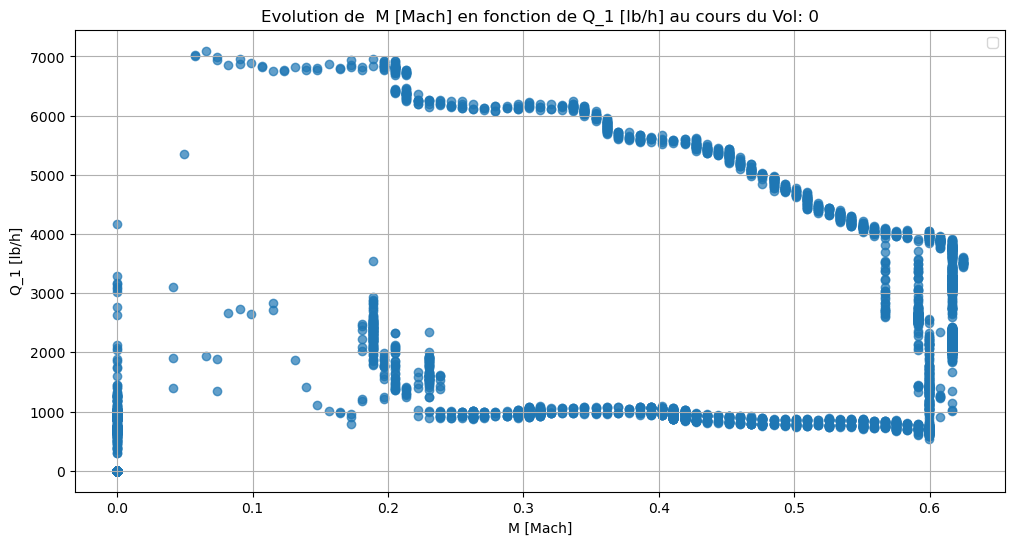

In [12]:

fct.Regression_lineaire(extract[keys[0]], 0, 'M [Mach]', 'Q_1 [lb/h]')

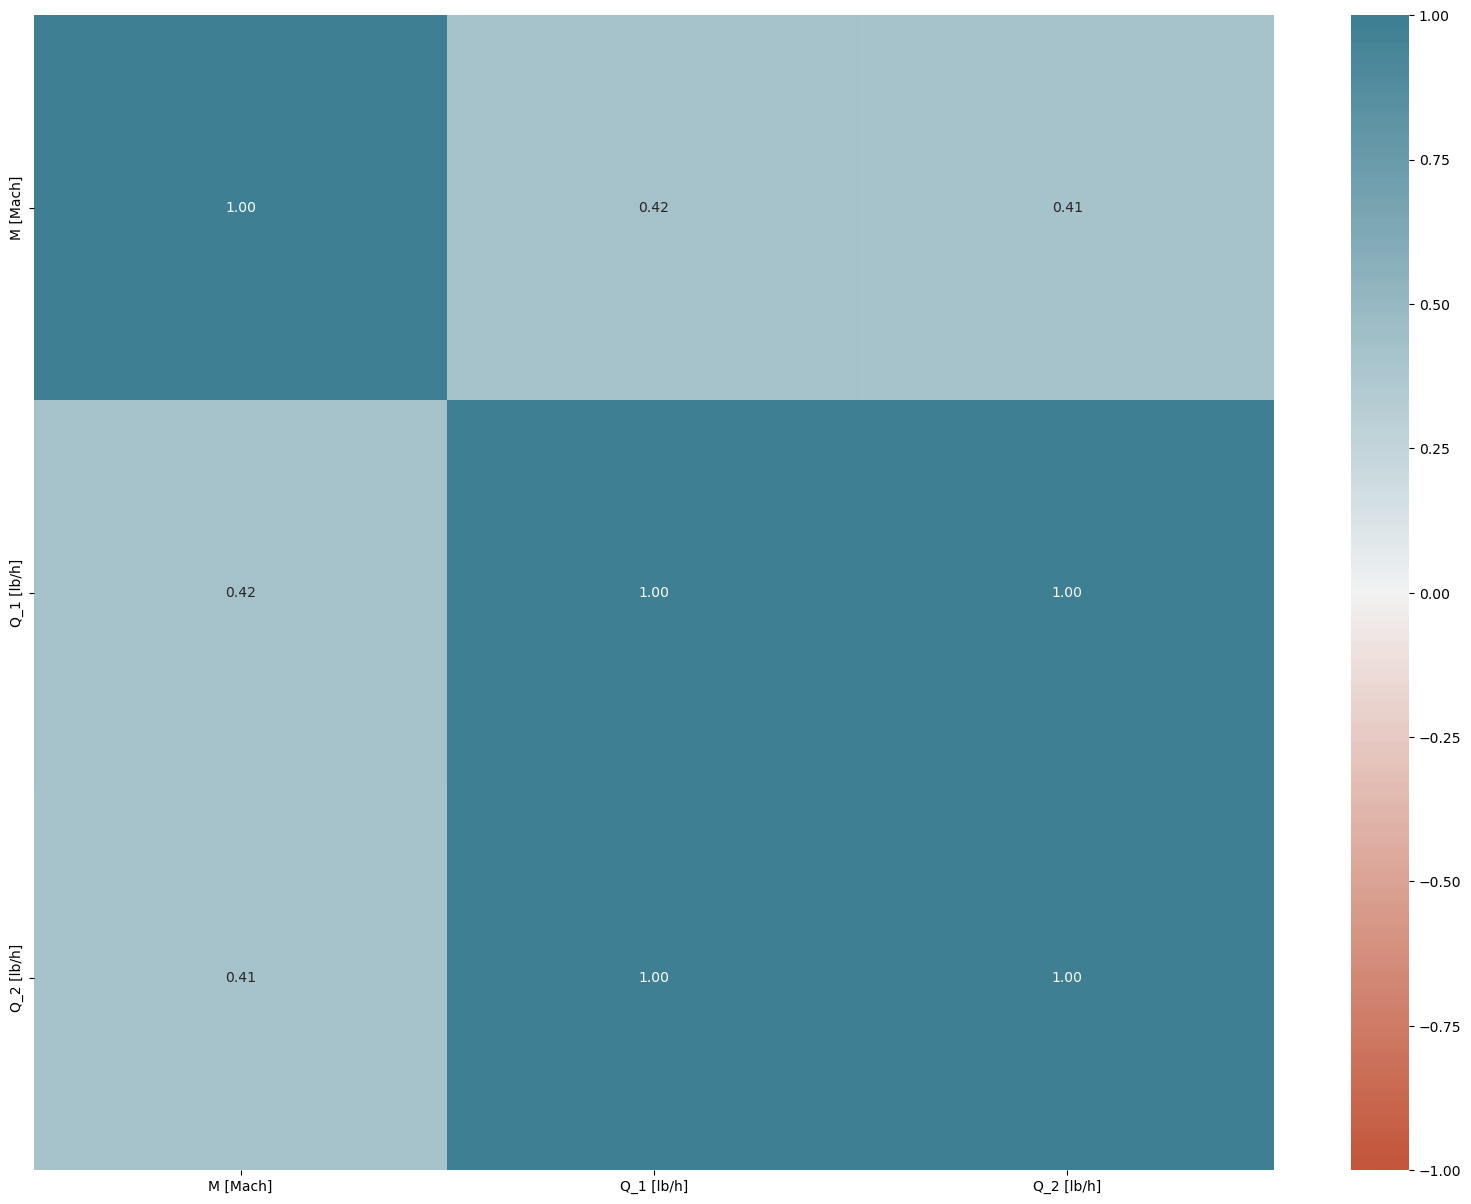

In [13]:
fct.Affichage_heat_map(extract[keys[0]], indice_part=1, List_col=['M [Mach]','Q_1 [lb/h]','Q_2 [lb/h]'] )

In [14]:
for i in range(10):
    print(extract[key].partitions[i].compute().shape)

(9124, 55)
(11842, 55)
(5734, 55)
(8130, 55)
(7523, 55)
(5251, 55)
(4983, 55)
(9160, 55)
(11325, 55)
(6206, 55)


### Étude de la consommation de carburant 

In [33]:

Index_Vol=[]
i=1
avion=[]
moteur=[]
Temps_Vol=[]
Conso=[]
for key in keys:
    data_avion=extract[key]
    avion=avion+list(np.zeros(2*(data_avion.npartitions))+i)
    i+=1
    Temps_Vol_Local=list(data_avion.map_partitions(lambda df: df.shape[0]).compute())
    Temps_Vol=Temps_Vol+Temps_Vol_Local+Temps_Vol_Local
    
    
    moteur=moteur+list(np.zeros((data_avion.npartitions))+1) +list(np.zeros((data_avion.npartitions))+2)
    Index_Vol_loc=list(data_avion.map_partitions(lambda df: df.index.name).compute())
    Index_Vol= Index_Vol+Index_Vol_loc+Index_Vol_loc
    
    
    Conso=Conso+list(data_avion.map_partitions(lambda df: df['Q_1 [lb/h]'].sum()).compute())+list(data_avion.map_partitions(lambda df: df['Q_2 [lb/h]'].sum()).compute())


In [25]:
list([np.zeros(4)+1])

[array([1., 1., 1., 1.])]

In [31]:
extract[key].map_partitions(lambda df: df['Q_2 [lb/h]'].sum()).compute().values

array([19249264.55655219, 25064781.97080656, 11696522.78184549, ...,
       12670740.56874913, 12143561.67791628, 11439275.91142807])

In [42]:
avion=(np.array(avion)).astype(int)
moteur=(np.array(moteur)).astype(int)


pd.DataFrame( np.array([avion,moteur,Index_Vol, Temps_Vol, Conso]).T , columns=["Avion", "Moteur", "Index_Vol", "Temps_Vol", "Conso"]  )

,Avion,Moteur,Index_Vol,Temps_Vol,Conso
0,1,1,record_02,7042,14529210.355377857
1,1,1,record_100,7248,14347727.796150774
2,1,1,record_180,8437,17702482.075749032
3,1,1,record_999,5495,11061052.221152527
4,1,1,record_181,8617,17732176.07099712
...,...,...,...,...,...
6001,3,2,record_992,4634,8476660.862335425
6002,3,2,record_993,3938,7820542.274015913
6003,3,2,record_994,5809,12670740.56874913
6004,3,2,record_995,5755,12143561.677916279
